CHIRALA RAMYA TULASI

ID: S5244



#INTRODUCTION

---



In the current global scenario, as the world grapples with the ongoing challenges posed by the COVID-19 pandemic, the imperative to create precise and efficient tools for disease prediction has never been more pronounced.

In response to this need, our proposal centers around constructing a machine learning model designed to forecast an individual's COVID-19 status based on a dataset of symptoms.

Significance in Today's Context:
The overwhelming impact of the COVID-19 pandemic on healthcare systems worldwide underscores the urgent demand for effective and dependable diagnostic approaches. Conventional methods, like PCR testing, often entail time-consuming laboratory procedures and face limitations in testing capacity. Our proposed machine learning model for COVID-19 prediction presents a promising solution, offering rapid and accurate assessments based solely on symptoms, eliminating the necessity for extensive laboratory testing. This can significantly enhance the early identification of COVID-19 cases, facilitating prompt medical intervention and optimal allocation of healthcare resources.

Enhancing Medical Treatment:
Precision in disease prediction holds a pivotal role in improving medical treatment outcomes. By accurately pinpointing individuals likely to test positive for COVID-19, our machine learning model facilitates early intervention, ensuring timely medical care and the implementation of necessary preventive measures.

**Impact on the Medical Landscape:**
The implementation of a screening tool grounded in our machine learning model could profoundly influence the medical field. It has the potential to alleviate the strain on healthcare systems by streamlining the diagnostic process, especially in regions with limited testing capacities.

**Future Applications and Bridging Knowledge Gaps:**
Beyond its immediate application in COVID-19 prediction, our proposed machine learning model serves as a versatile framework for predicting other diseases based on symptoms. The insights gained during the model's development, including feature selection techniques and algorithmic approaches, can be leveraged in future disease prediction endeavors. This has the potential to bridge knowledge gaps across various healthcare domains, enabling quicker and more accurate diagnoses of diseases beyond COVID-19.

**Initial Hypotheses**

Drawing from the provided dataset, we formulate the following initial hypotheses:

**Hypothesis 1: Enhanced Risk for Those in Close Contact:**
Individuals who have direct contact with confirmed COVID-19 positive patients are more likely to test positive for the virus. This hypothesis prompts an exploration of the correlation between "Known_contact" in the dataset and the likelihood of testing positive for COVID-19.

**Hypothesis 2: Symptomatic Indicators of COVID-19:**
Symptoms such as shortness of breath, fever, and cough are pivotal in predicting COVID-19 positive cases. Analyzing the variables "Shortness_of_breath," "Fever," and "Cough_symptoms" in the dataset allows for an examination of the relationship between these symptoms and the likelihood of being COVID-19 positive or negative.

It is crucial to note that these hypotheses serve as initial conjectures based on the provided dataset. Further analysis and modeling efforts are essential to validate these assumptions and uncover additional insights related to COVID-19 prediction.

**Hypothesis 3: Irrelevant Columns for COVID-19 Prediction:**
Certain columns, such as 'Ind_id' and 'Test_Date,' may not directly contribute to the prediction of COVID-19. Hence, these columns can be excluded from further analysis.

# CAPSTONE PROJECT ML

In [1]:
import pandas as pd #importing required packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading data frame
covid_df_main = pd.read_csv("/content/CAP+Project+2+-+corona_tested_006 (1).zip")

#Creating copy of dataframe
covid_df = covid_df_main.copy()

<ipython-input-2-df760c5266b3>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_df_main = pd.read_csv("/content/CAP+Project+2+-+corona_tested_006 (1).zip")


In [3]:
#checking the data-types
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [4]:
#Checking the shape
covid_df.shape

(278848, 11)

In [5]:
covid_df.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [6]:
#Columns of the dataset
covid_df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [7]:
#checking for the values of individual columns.
for i in covid_df:
  print(i,  ":" , covid_df[i].value_counts())

Ind_ID : 1         1
185898    1
185904    1
185903    1
185902    1
         ..
92955     1
92956     1
92957     1
92958     1
278848    1
Name: Ind_ID, Length: 278848, dtype: int64
Test_date : 20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-0

In [8]:
#Checking Null values
covid_df.isna().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

**Observations from the Dataset **

1.From the above data that I loaded, I see that there are total of 2,78,848 rows/observartions and 11 columns/features.

2.Majority of the columns are of categorical features(nominal variable) except 'Ind_Id' and 'Test_date'.
I also noticed that there are boolean values i.e. True and False with some duplicate values to be cleaned.



# CLEANING DATASET


In [9]:
covid_df.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


#CLEANING DUPLICATES VALUES FOR EACH COLUMN

In [10]:
# Replacing duplicate strings in Cough Symptoms column with boolean values and None with NaN
covid_df['Cough_symptoms'].replace({'TRUE': True, 'FALSE': False,"None" : np.nan}, inplace=True)

covid_df["Cough_symptoms"].value_counts()

False    236368
True      42228
Name: Cough_symptoms, dtype: int64

In [11]:
# Replacing duplicate strings in Fever column with boolean values and None with NaN

covid_df['Fever'].replace({'TRUE': True, 'FALSE': False,"None" : np.nan}, inplace=True)

covid_df['Fever'].value_counts()

False    256844
True      21752
Name: Fever, dtype: int64

In [12]:
# Replacing duplicate strings in Sore_throat column with boolean values and None with NaN

covid_df['Sore_throat'].replace({'TRUE': True, 'FALSE': False,"None" : np.nan}, inplace=True)

covid_df['Sore_throat'].value_counts()

False    276921
True       1926
Name: Sore_throat, dtype: int64

In [13]:
# Replacing duplicate strings in Shortness_if_breath column with boolean values and None with NaN

covid_df['Shortness_of_breath'].replace({'TRUE': True, 'FALSE': False,"None" : np.nan}, inplace=True)

covid_df['Shortness_of_breath'].value_counts()

False    277270
True       1577
Name: Shortness_of_breath, dtype: int64

In [14]:
# Replacing duplicate strings in Headache column with boolean values and None with NaN

covid_df['Headache'].replace({'TRUE': True, 'FALSE': False,"None" : np.nan}, inplace=True)

covid_df['Headache'].value_counts()

False    276433
True       2414
Name: Headache, dtype: int64

In [15]:
# Replacing yes and no strings in Age_60_Above column with boolean values and None with NaN

covid_df['Age_60_above'].replace({'Yes': True, 'No': False,"None" : np.nan}, inplace=True)


covid_df['Age_60_above'].value_counts()

False    125703
True      25825
Name: Age_60_above, dtype: int64

In [16]:
# Replacing None in Sex column with NaN

covid_df['Sex'].replace({"None" : np.nan}, inplace=True)


covid_df['Sex'].value_counts()

female    130158
male      129127
Name: Sex, dtype: int64

In [17]:
# Replacing other  in  Corona column with NaN

covid_df["Corona"].replace({"other": np.nan},inplace = True)


covid_df['Corona'].value_counts()


negative    260227
positive     14729
Name: Corona, dtype: int64

In [18]:
#checking for the values of individual columns.
for i in covid_df:
  print(i,  ":" , covid_df[i].value_counts())

Ind_ID : 1         1
185898    1
185904    1
185903    1
185902    1
         ..
92955     1
92956     1
92957     1
92958     1
278848    1
Name: Ind_ID, Length: 278848, dtype: int64
Test_date : 20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-0

In [19]:
#create a table with data missing
missing_values=covid_df.isnull().sum() # missing values

percent_missing = covid_df.isnull().sum()/covid_df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Ind_ID,0,0.000000
Test_date,0,0.000000
Cough_symptoms,252,0.090372
Fever,252,0.090372
Sore_throat,1,0.000359
Shortness_of_breath,1,0.000359
Headache,1,0.000359
Corona,3892,1.395742
Age_60_above,127320,45.659284
Sex,19563,7.015650


**OBSERVATIONS **

1. Columns like 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache','Corona' have weightage of null values less than 5% of the total value, so dropping them will be the best option instead of imputing them with some values as imputing them can make our data bias.
2. Columns like 'Age_60_above' and 'Sex' have a higher null values so imputing them will be the best choice.

In [20]:
# So from above observations we can drop null values
covid_df.dropna(subset=['Cough_symptoms', 'Fever','Corona'],inplace = True)

covid_df["Cough_symptoms"].isna().sum()

0

In [21]:
covid_df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [22]:
#checking a table with data missing
missing_values=covid_df.isnull().sum() # missing values

percent_missing = covid_df.isnull().sum()/covid_df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Ind_ID,0,0.000000
Test_date,0,0.000000
Cough_symptoms,0,0.000000
Fever,0,0.000000
Sore_throat,0,0.000000
Shortness_of_breath,0,0.000000
Headache,0,0.000000
Corona,0,0.000000
Age_60_above,125659,45.743751
Sex,19034,6.928963


**OBSERVATION**

From above we can say Age_60_above and Sex Column have more null values more than 5% So , as both columns are categorical i can replace nan values with mode of the column.

In [23]:
#Replacing Nan values with mode for age_60_above and gender columns
df = covid_df.copy()

gender_mode = covid_df["Sex"].mode().iloc[0]

covid_df['Sex'].replace({pd.NA: gender_mode}, inplace=True)


In [24]:
covid_df["Sex"].value_counts()

female    147447
male      127255
Name: Sex, dtype: int64

In [25]:
covid_df["Age_60_above"].value_counts()

gender_mode = covid_df["Age_60_above"].mode().iloc[0]

covid_df['Age_60_above'].replace({pd.NA: gender_mode}, inplace=True)

In [26]:
#Removing unwanted columns as these columns are not required for Covid-19 prediction.

covid_df.drop(columns=['Ind_ID'],inplace=True)

In [27]:
#Checking postive and negative count after cleaning

covid_df["Corona"].value_counts()

negative    260008
positive     14694
Name: Corona, dtype: int64

In [28]:
#INFO AFTER CLEANING DATASET
covid_df.info

<bound method DataFrame.info of          Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       11-03-2020           True  False        True               False   
1       11-03-2020          False   True       False               False   
2       11-03-2020          False   True       False               False   
3       11-03-2020           True  False       False               False   
4       11-03-2020           True  False       False               False   
...            ...            ...    ...         ...                 ...   
278843  30-04-2020          False  False       False               False   
278844  30-04-2020          False  False       False               False   
278845  30-04-2020          False  False       False               False   
278846  30-04-2020          False  False       False               False   
278847  30-04-2020          False  False       False               False   

       Headache    Corona  Age_60_above     Sex        

**OBSERVATIONS**

After cleaning we have 2,74,702 observations and earlier it was 2,78,848.
I have dealt with all the 'None' and 'Other' values in rescpective columns.
I also noticed that in Corona column * Negetive Corona Patient are- 2,60,008 * Positive Corona Patient are- 14,694

# VISUALIZING DATA CORONA+ VS SYMPTOMS

<Axes: xlabel='Corona', ylabel='count'>

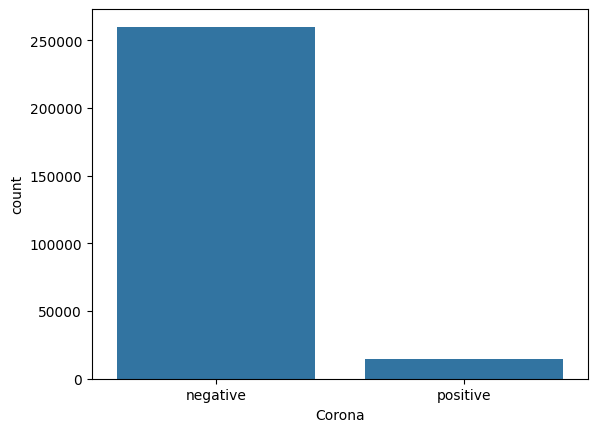

In [29]:
#Distribution of target variable

sns.countplot(x='Corona',data=covid_df)


In [30]:
#Selecting features

features = covid_df.columns.tolist()
features.remove('Corona')
features.remove('Test_date')
print(features)

['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']


In [31]:
# creating new dataframe with Corona value

df_positive = covid_df[covid_df['Corona'] ==  'positive']
df_negative = covid_df[covid_df['Corona'] == 'negative']

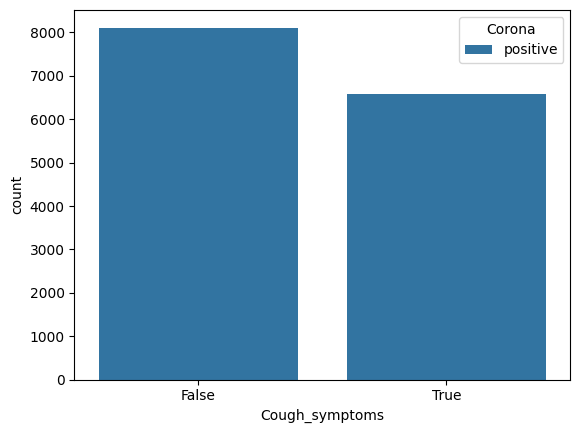

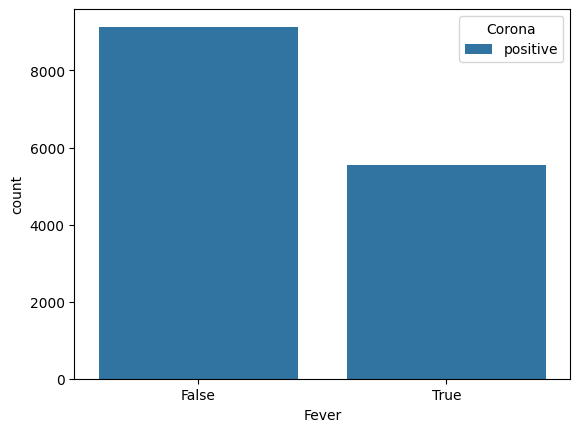

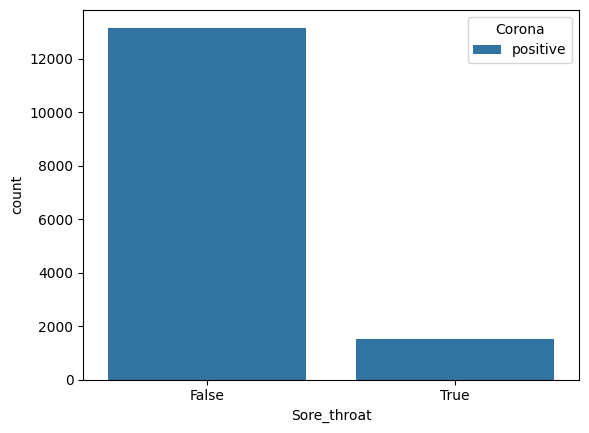

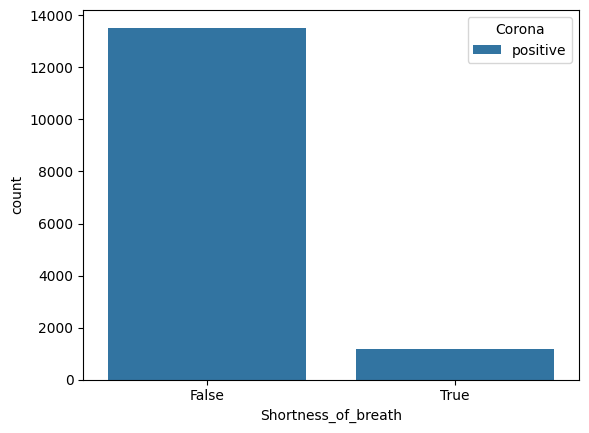

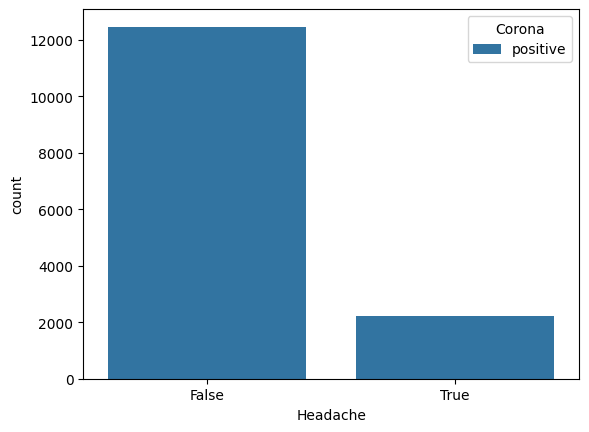

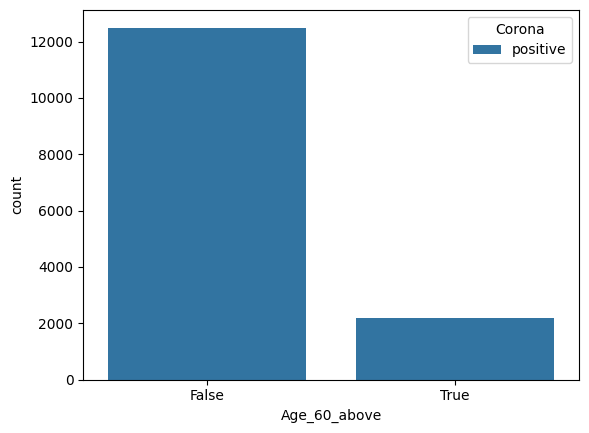

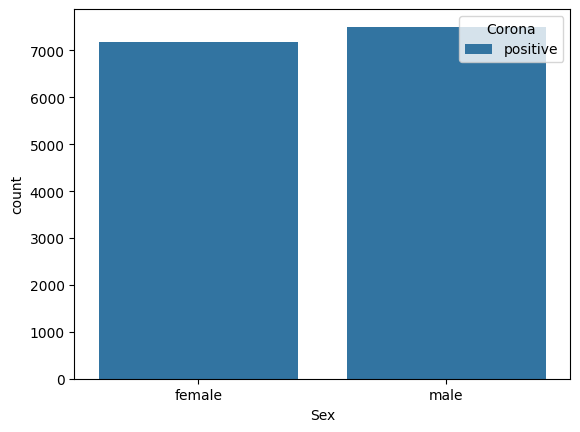

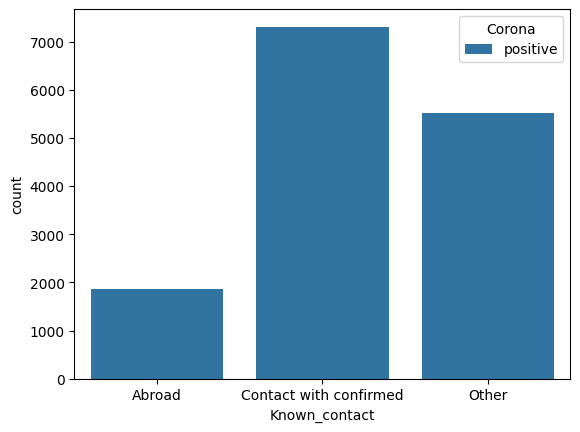

In [32]:
#Graph between features and target variable
for feature in features:
    plt.figure()
    sns.countplot(x= feature,hue='Corona',data=df_positive)
    plt.savefig('Corona-Positive vs Symptoms.png')

Observations:

1.Mostly Patients with corona positive have cough_symptoms and fever.

2.Headache, sore throat and shortness of breath are not present in Corona positive patients.

3.Majority of Corona Positive Patients have been in contact with other positive patients.

4.Majority of males are corona positive.

5.Majority of the Corona(+) patients are below age of 60

#FEATURE ENGINEERING:
In this process we will tranform our data into features that are most suitable for machine learning model.

It includes:

Feature Tranformation
Feature Scaling
Train_test_split

#LABEL ENCODING

In [33]:
# Converting all categorical variables to numerical columns using Label encoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler

le = LabelEncoder()

covid_df.columns


Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [34]:
covid_df['Fever']=le.fit_transform(covid_df['Fever'])

covid_df['Fever'].value_counts()

0    253328
1     21374
Name: Fever, dtype: int64

In [35]:
covid_df['Cough_symptoms']=le.fit_transform(covid_df['Cough_symptoms'])

covid_df['Cough_symptoms'].value_counts()

0    233133
1     41569
Name: Cough_symptoms, dtype: int64

In [36]:
covid_df['Sore_throat']=le.fit_transform(covid_df['Sore_throat'])

covid_df['Sore_throat'].value_counts()

0    272814
1      1888
Name: Sore_throat, dtype: int64

In [37]:
covid_df['Shortness_of_breath']=le.fit_transform(covid_df['Shortness_of_breath'])

covid_df['Shortness_of_breath'].value_counts()

0    273156
1      1546
Name: Shortness_of_breath, dtype: int64

In [38]:
covid_df['Headache']=le.fit_transform(df['Headache'])

covid_df['Headache'].value_counts()

0    272325
1      2377
Name: Headache, dtype: int64

In [39]:
covid_df['Corona']=le.fit_transform(covid_df['Corona'])

covid_df['Corona'].value_counts()

0    260008
1     14694
Name: Corona, dtype: int64

In [40]:
covid_df['Age_60_above']=le.fit_transform(covid_df['Age_60_above'])

covid_df['Age_60_above'].value_counts()


0    249327
1     25375
Name: Age_60_above, dtype: int64

In [41]:
covid_df['Sex']=le.fit_transform(covid_df['Sex'])

covid_df['Sex'].value_counts()


0    147447
1    127255
Name: Sex, dtype: int64

In [42]:
covid_df['Known_contact']=le.fit_transform(covid_df['Known_contact'])

covid_df['Known_contact'].value_counts()

2    239167
0     25068
1     10467
Name: Known_contact, dtype: int64

In [43]:
# 'Cough_symptoms' (True = 1 , False = 0)
# 'FEVER' (True = 1 , False = 0)
# 'Sore_throat' (True = 1 , False = 0)
# 'Shortness_of_breath' (True = 1 , False = 0)
# 'Headache' (True = 1 , False = 0)
# Corona (Positive = 1 , Negative = 0)
# Age_60_above (False=0 , True = 1 )
# Sex ( Female=0, Male=1)
# Known_contact (Abroad=0, Contact with confirmed = 1, other = 2)

covid_df[covid_df['Test_date'] == "2020-04-15"]

covid_df.head()

covid_df['Test_date'] = pd.to_datetime(covid_df['Test_date'])

covid_df

<ipython-input-43-3fce81bc09a8>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  covid_df['Test_date'] = pd.to_datetime(covid_df['Test_date'])


,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-11-03,1,0,1,0,0,0,0,0,0
1,2020-11-03,0,1,0,0,0,1,0,0,0
2,2020-11-03,0,1,0,0,0,1,0,0,0
3,2020-11-03,1,0,0,0,0,0,0,0,0
4,2020-11-03,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,0,0,0,0,0,1,0,1,2
278844,2020-04-30,0,0,0,0,0,0,0,0,2
278845,2020-04-30,0,0,0,0,0,0,0,1,2
278846,2020-04-30,0,0,0,0,0,0,0,1,2


#MACHINE LEARNING

#TRAIN TEST SPLIT BASED ON DATA
1.Spliting the dataset as training and testing data with the help of date.

2.We have to consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set.

In [44]:
# Breaking the data according to the date

break_date = pd.Timestamp("2020-04-15")
df_train_set = covid_df[covid_df["Test_date"] <= break_date]
df_test_set = covid_df[covid_df["Test_date"] > break_date]


df_train_set

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
928,2020-03-13,0,0,0,0,0,0,0,0,2
929,2020-03-13,0,0,0,0,0,0,0,0,2
930,2020-03-13,0,0,0,0,0,1,0,0,1
931,2020-03-13,1,1,0,0,0,1,0,0,0
932,2020-03-13,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
163184,2020-04-15,0,0,0,0,0,0,0,1,2
163185,2020-04-15,0,0,0,0,0,0,0,1,2
163186,2020-04-15,0,0,0,0,0,0,0,0,2
163187,2020-04-15,0,0,0,0,0,0,0,1,2


In [45]:
df_test_set

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-11-03,1,0,1,0,0,0,0,0,0
1,2020-11-03,0,1,0,0,0,1,0,0,0
2,2020-11-03,0,1,0,0,0,1,0,0,0
3,2020-11-03,1,0,0,0,0,0,0,0,0
4,2020-11-03,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,0,0,0,0,0,1,0,1,2
278844,2020-04-30,0,0,0,0,0,0,0,0,2
278845,2020-04-30,0,0,0,0,0,0,0,1,2
278846,2020-04-30,0,0,0,0,0,0,0,1,2


In [46]:
#Spliting data into dependent and independent variable
X_train=df_train_set.drop(columns=['Test_date','Corona'],axis=1)

In [47]:
#Keeping data from 11th March to 15th April in training set as X_train and Y_train

X_train

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
928,0,0,0,0,0,0,0,2
929,0,0,0,0,0,0,0,2
930,0,0,0,0,0,0,0,1
931,1,1,0,0,0,0,0,0
932,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...
163184,0,0,0,0,0,0,1,2
163185,0,0,0,0,0,0,1,2
163186,0,0,0,0,0,0,0,2
163187,0,0,0,0,0,0,1,2


In [48]:
y_train=df_train_set['Corona']

y_train

928       0
929       0
930       1
931       1
932       0
         ..
163184    0
163185    0
163186    0
163187    0
163188    0
Name: Corona, Length: 116543, dtype: int64

In [49]:
#keeping data from 16th April to 30th April in X_test and y_test
X_test=df_test_set.drop(columns=['Test_date','Corona'],axis=1)

X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,0,1,2
278844,0,0,0,0,0,0,0,2
278845,0,0,0,0,0,0,1,2
278846,0,0,0,0,0,0,1,2


In [50]:
y_test=df_test_set['Corona']

y_test

0         0
1         1
2         1
3         0
4         0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 158159, dtype: int64

In [51]:
# We have to divide X_train , y_train into Training Set and Validation in the ratio 4:1 which means 20%
#test_size=0.20 will divide the data further into 80% as training set and 20% as test set
# random_state=10 will fix the data set and will prevent random selection of data

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 10)

In [52]:
#Training set

print('X_train Shape is:',X_train.shape)
print('y_train Shape is:',y_train.shape)
print('----------------------------------------')

#Testing set

print('X_test Shape is:',X_test.shape)
print('y_test Shape is:',y_test.shape)
print('----------------------------------------')

#Validation Set
print('X_validation Shape is:', X_val.shape)
print('y_validation Shape is:', y_val.shape)

X_train Shape is: (93234, 8)
y_train Shape is: (93234,)
----------------------------------------
X_test Shape is: (158159, 8)
y_test Shape is: (158159,)
----------------------------------------
X_validation Shape is: (23309, 8)
y_validation Shape is: (23309,)


#FEATURE SCALING
Is the process of tranforming the data so that they have a similar scale.

**Benifits of Feature Scaling:**

Improves model performance
Increase model robustness
Improves model interpretability

In [53]:
#Importing StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

#Assigning Object
Std_scale=StandardScaler()

In [54]:
X_train=pd.DataFrame(Std_scale.fit_transform(X_train),columns=X_train.columns)

X_train


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
0,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,1.139517,0.372847
1,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,1.139517,0.372847
2,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,-0.877565,0.372847
3,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,1.139517,0.372847
4,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,-0.877565,0.372847
...,...,...,...,...,...,...,...,...
93229,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,1.139517,0.372847
93230,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,1.139517,0.372847
93231,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,1.139517,0.372847
93232,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,-0.877565,0.372847


In [55]:
X_test=pd.DataFrame(Std_scale.transform(X_test),columns=X_test.columns)

X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
0,2.46944,-0.294159,8.991997,-0.103756,-0.127266,-0.413275,-0.877565,-3.082447
1,-0.40495,3.399525,-0.111210,-0.103756,-0.127266,-0.413275,-0.877565,-3.082447
2,-0.40495,3.399525,-0.111210,-0.103756,-0.127266,-0.413275,-0.877565,-3.082447
3,2.46944,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,-0.877565,-3.082447
4,2.46944,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,-0.877565,-1.354800
...,...,...,...,...,...,...,...,...
158154,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,1.139517,0.372847
158155,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,-0.877565,0.372847
158156,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,1.139517,0.372847
158157,-0.40495,-0.294159,-0.111210,-0.103756,-0.127266,-0.413275,1.139517,0.372847


#MACHINE LEARNING MODELS


#MODEL 1:- LOGISTIC REGRESSION**
It is supervised Machine Learning algorithm mainly used from classification task and our main objective is to predict someone is Corona(+) or Corona(-).

In [56]:
#importing LogisticRegression from sklearn library
from sklearn.linear_model import LogisticRegression
#Assigning Object to the model
log_reg=LogisticRegression()

In [57]:
#fitting our X_train and y_train into logistic model that we created above
log_reg.fit(X_train,y_train)


LogisticRegression()

In [58]:
#Checking pridiction of the model
model_pred=log_reg.predict(X_test)
model_pred

array([1, 0, 0, ..., 0, 0, 0])

In [59]:
#to remove warnings import warning module
import warnings
warnings.filterwarnings("ignore")

In [60]:
#Checking Accuracy of our model with the help of accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy Score:-')
print("Train accuracy of Logistic Regression is", round(log_reg.score(X_train, y_train)*100,2))
print("Test accuracy of Logistic Regression is", round(accuracy_score(y_test, model_pred)*100,2))
print('-----------------------------------------------------------------------------------------------')
#Checking accuracy with the help of classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:-')
print(classification_report(y_test,model_pred))

Accuracy Score:-
Train accuracy of Logistic Regression is 94.1
Test accuracy of Logistic Regression is 96.65
-----------------------------------------------------------------------------------------------
Classification Report:-
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    152503
           1       0.67      0.12      0.21      5656

    accuracy                           0.97    158159
   macro avg       0.82      0.56      0.60    158159
weighted avg       0.96      0.97      0.96    158159



#INSIGHTS:
The accuracy of LogisticRegression model is 96.65%

#MODEL 2:- KNN(K-NEAREST NEIGHBOUR)
KNN is a Supervised Learning, a non-parametric algorithm, and a lazy learner algorithm that categorizes the new data into the available categories based on similarity.

1.It is non-parametric, which means it does not make any assumption on underlying data.

2.It is a lazy learner algorithm since it saves the dataset instead of learning immediately from the training set and then uses it to execute an action when classifying data.

In [61]:
#importing KNN model
from sklearn.neighbors import KNeighborsClassifier


In [62]:
#assigning object to the model
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
#fitting data to our model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [63]:
#making prediction on the model

knn_pred=knn.predict(X_test)


In [64]:
#Checking Accuracy of our model with the help of accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy Report:-')
print("Train accuracy of KNN is", round(knn.score(X_train, y_train)*100,2))
print("Test accuracy of KNN is", round(accuracy_score(y_test, knn_pred)*100,2))
print('-----------------------------------------------------------------------------------------------')
#Checking accuracy with the help of classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:-')
print(classification_report(y_test,knn_pred))

Accuracy Report:-
Train accuracy of KNN is 95.41
Test accuracy of KNN is 96.4
-----------------------------------------------------------------------------------------------
Classification Report:-
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    152503
           1       0.50      0.48      0.49      5656

    accuracy                           0.96    158159
   macro avg       0.74      0.73      0.74    158159
weighted avg       0.96      0.96      0.96    158159



#INSIGHTS

The accuracy of KNN model is 96.4

#MODEL 3:- DECISION TREE
1.One of the widely used supervised type machine learning methods for classification and regression is the decision tree algorithm. It also known as classification and regression tree (CART).

2.According to predetermined principles, data is constantly divided in this algorithm at each row till the final result is obtained. Decision trees classify the results into groups until no more similarity is left. Decision tree is non-parametric approach and does not depend on any probability distribution assumptions.

In [65]:
#importing decision tree model
from sklearn.tree import DecisionTreeClassifier

In [66]:
#assigning object to the model
d_tree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
#fitting data to our model
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [67]:
#making prediction on our model

dt_pred=d_tree.predict(X_test)


In [68]:
#Checking Accuracy of our model with the help of accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy Report:-')
print("Train accuracy of Decision Tree is", round(d_tree.score(X_train, y_train)*100,2))
print("Test accuracy of Decision Tree is", round(accuracy_score(y_test, dt_pred)*100,2))
print('-----------------------------------------------------------------------------------------------')
#Checking accuracy with the help of classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:-')
print(classification_report(y_test,dt_pred))

Accuracy Report:-
Train accuracy of Decision Tree is 95.33
Test accuracy of Decision Tree is 97.27
-----------------------------------------------------------------------------------------------
Classification Report:-
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    152503
           1       0.64      0.55      0.59      5656

    accuracy                           0.97    158159
   macro avg       0.81      0.77      0.79    158159
weighted avg       0.97      0.97      0.97    158159



#INSIGHTS
The accuracy of DecisionTreeClassifier is 97.27%

#MODEL 4:- RANDOM FOREST
1.Random Forest mixes the output of various decision trees to produce a single conclusion. Its widespread use is motivated by its adaptability and usability because it can solve classification and regression issues.

2.The concept of Breiman's "bagging" is combined with a random selection of elements to create random forest. By using the average or mode of the results from several decision trees, the forecast is meant to be more precise. The more decision trees that are taken into account, the more precise the results will be. Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

In [69]:
#importing RandomForest model
from sklearn.ensemble import RandomForestClassifier

In [70]:
#assigning object to our model
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
#fitting data to our model
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [71]:
#predicting our model
rf_pred=rf.predict(X_test)

In [72]:
#Checking Accuracy of our model with the help of accuracy_score
from sklearn.metrics import accuracy_score
print('Accuracy Report:-')
print("Train accuracy of Random Forest is", round(rf.score(X_train, y_train)*100,2))
print("Test accuracy of Random Forest is", round(accuracy_score(y_test, rf_pred)*100,2))
print('-----------------------------------------------------------------------------------------------')
#Checking accuracy with the help of classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:-')
print(classification_report(y_test,rf_pred))

Accuracy Report:-
Train accuracy of Random Forest is 95.93
Test accuracy of Random Forest is 97.41
-----------------------------------------------------------------------------------------------
Classification Report:-
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    152503
           1       0.69      0.50      0.58      5656

    accuracy                           0.97    158159
   macro avg       0.84      0.75      0.78    158159
weighted avg       0.97      0.97      0.97    158159



#INSIGHTS
The accuracy of RANDOM FOREST is 97.41%

#INSIGHTS
1.The accuracy score of LogistiRegression model is 96.65%
2.The accuracy score of KNN is 96.4%, Decision Tree and Random Forest is almost similar to 97%
3.So we can use any of the 3 model mentioned above for better prediction

#SQL PART:-

In [73]:
df.to_csv('cleaned_covid_file.csv',index=False)

#using the cleaned file that we saved earlier

sql_df=pd.read_csv('cleaned_covid_file.csv')

In [74]:
sql_df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
274697,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
274698,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
274699,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
274700,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [75]:
#importing duckdb library for sql analysis
import duckdb

In [76]:
#Assigning variable to duckdb
sql=duckdb.connect()
#Registering our variable
sql.register('sql_df',sql_df)

In [77]:
#checking our sql qurries are working properly or not
sql.execute("select * from sql_df limit 5").fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,None,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,None,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,None,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,None,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,None,Contact with confirmed


#SQL Querries:-

1.Find the number of corona patients who faced shortness of breath.

2.Find the number of negative corona patients who have fever and sore_throat.

3.Group the data by month and rank the number of positive cases.

4.Find the female negative corona patients who faced cough and headache.

5.How many elderly corona patients have faced breathing problems?

6.Which three symptoms were more common among COVID positive patients?

7.Which symptom was less common among COVID negative people?

8.What are the most common symptoms among COVID positive males whose known contact was abroad

In [78]:
#1.Find the number of corona patients who faced shortness of breath.

query = '''select count(*) as 'No.of Corona Patients' from sql_df
where Corona='positive' and Shortness_of_breath='True'; '''

sql.execute(query).fetch_df()

,No.of Corona Patients
0,1162


In [79]:
#2.Find the number of negative corona patients who have fever and sore_throat.

query = '''select count(*) as 'No.of Corona Patients' from sql_df
where Corona='negative' and Fever = True and Sore_throat = True ; '''

sql.execute(query).fetch_df()

,No.of Corona Patients
0,121


In [80]:
#3.Group the data by month and rank the number of positive cases.

query = """
SELECT FORMAT(Test_date, '%Y-%m') AS month, COUNT(Corona) AS Corona_Count
FROM sql_df
WHERE Corona = 'positive'
GROUP BY month
ORDER BY Corona_Count DESC;
"""

sql.execute(query).fetch_df()


,month,Corona_Count
0,31-03-2020,729
1,01-04-2020,681
2,02-04-2020,615
3,30-03-2020,611
4,26-03-2020,541
5,27-03-2020,516
6,05-04-2020,505
7,03-04-2020,504
8,25-03-2020,486
9,07-04-2020,483


In [82]:
#4.Find the female negative corona patients who faced cough and headache.
query = '''select Sex,Headache,Cough_symptoms,Corona,count(*) as 'N_patient' from sql_df
where Corona='negative' and Cough_symptoms='True' and Headache='True' and Sex='female'
group by Sex,Headache,Cough_symptoms,Corona '''

sql.execute(query).fetch_df()

,Sex,Headache,Cough_symptoms,Corona,N_patient
0,female,True,True,negative,32


In [83]:
#5.How many elderly corona patients have faced breathing problems?

query = '''select Age_60_above,Shortness_of_breath,Corona,count(*) as 'N_patient' from sql_df
where Corona='positive' and Shortness_of_breath='True' and Age_60_above=True
group by Age_60_above,Shortness_of_breath,Corona '''

sql.execute(query).fetch_df()

,Age_60_above,Shortness_of_breath,Corona,N_patient
0,True,True,positive,262


In [115]:
#6.Which three symptoms were more common among COVID positive patients?

query = """
    SELECT 'Cough_symptoms' AS Symptom, COUNT(*) AS Occurrences FROM sql_df WHERE Corona = 'positive' AND Cough_symptoms = True
    UNION
    SELECT 'Fever' AS Symptom, COUNT(*) AS Occurrences FROM sql_df WHERE Corona = 'positive' AND Fever = True
    UNION
    SELECT 'Shortness_of_breath' AS Symptom, COUNT(*) AS Occurrences FROM sql_df WHERE Corona = 'positive' AND Shortness_of_breath = True
    UNION
    SELECT 'Sore_throat' AS Symptom, COUNT(*) AS Occurrences FROM sql_df WHERE Corona = 'positive' AND Sore_throat = True
    ORDER BY Occurrences DESC LIMIT 3
"""



sql.execute(query).fetch_df()


,Symptom,Occurrences
0,Cough_symptoms,6582
1,Fever,5558
2,Sore_throat,1523


In [118]:
#7.Which symptom was less common among COVID negative people?

query = """
    SELECT 'Cough_symptoms' AS Symptom, COUNT(*) AS Occurrences FROM sql_df WHERE Corona = 'negative' AND Cough_symptoms = True
    UNION
    SELECT 'Fever' AS Symptom, COUNT(*) AS Occurrences FROM sql_df WHERE Corona = 'negative' AND Fever = True
    UNION
    SELECT 'Shortness_of_breath' AS Symptom, COUNT(*) AS Occurrences FROM sql_df WHERE Corona = 'negative' AND Shortness_of_breath = True
    UNION
    SELECT 'Sore_throat' AS Symptom, COUNT(*) AS Occurrences FROM sql_df WHERE Corona = 'negative' AND Sore_throat = True
    ORDER BY Occurrences LIMIT 3
"""



sql.execute(query).fetch_df()

,Symptom,Occurrences
0,Sore_throat,365
1,Shortness_of_breath,384
2,Fever,15816


In [131]:
#8.What are the most common symptoms among COVID positive males whose known contact was abroad

query = """
    SELECT 'Cough_symptoms' AS Symptom, COUNT(*) AS Occurrences FROM sql_df WHERE Corona = 'positive' AND Cough_symptoms = True and Known_contact = 'Abroad' and Sex = 'male'
    UNION
    SELECT 'Fever' AS Symptom,COUNT(*) AS Occurrences FROM sql_df WHERE Corona = 'positive' AND Fever = True and Known_contact = 'Abroad' and Sex = 'male'
    UNION
    SELECT 'Shortness_of_breath' AS Symptom, COUNT(*) AS Occurrences FROM sql_df WHERE Corona = 'positive' AND Shortness_of_breath = True and Known_contact = 'Abroad' and Sex = 'male'
    UNION
    SELECT 'Sore_throat' AS Symptom,COUNT(*) AS Occurrences FROM sql_df WHERE Corona = 'positive' AND Sore_throat = True and Known_contact = 'Abroad' and Sex = 'male'
    ORDER BY Occurrences DESC
"""



sql.execute(query).fetch_df()

,Symptom,Occurrences
0,Cough_symptoms,532
1,Fever,407
2,Sore_throat,87
3,Shortness_of_breath,84


In [121]:
sql_df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [122]:
sql_df["Known_contact"].value_counts()

Other                     239167
Abroad                     25068
Contact with confirmed     10467
Name: Known_contact, dtype: int64

# INSIGHTS
1.Cough symptoms and fever and Sorethroat symptoms are most 3 common symptoms in Covid +ve patients.

2.Cough symptoms and fever are the most common symptoms in male Covid +ve patients whose known contact is abroad.